In [170]:
import pandas as pd
import matplotlib.style as mplstyle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from functions import *

mplstyle.use(['ggplot', 'fast'])

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* fiks rekkefølgen på ting
* endre poly feat til å funke på reshape, sjekk at det går på både ols og ridge. 

# a)

In [171]:
test_size = 0.2

In [172]:
# Various number of data points and polynomial degrees
n_vals = np.arange(50, 2100, 150)
p_vals = np.arange(2, 16)

Lag dataset med maks n?

* lage data set og split utfor lOOP?
* hva sammenlignes..?
* plot y_pred og y sammen??

In [173]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        X = polynomial_features(x, p, intercept=False)
        #X, y = standardize(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        theta = OLS_parameters(X_train, y_train)
        y_pred = X_test @ theta

        results.append({'n': n, 'p': p, 'theta': theta, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_OLS = pd.DataFrame(results)

Text(0.5, 0.98, 'OLS')

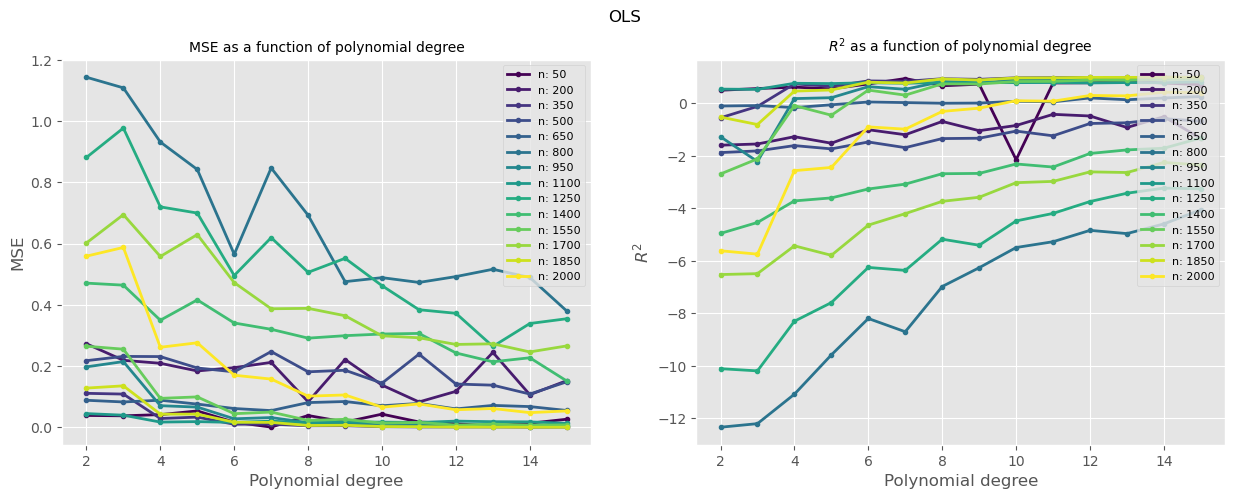

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[0].set_title('MSE as a function of polynomial degree', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[1].set_title(r'$R^2$ as a function of polynomial degree', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

Text(0.5, 0.98, 'OLS')

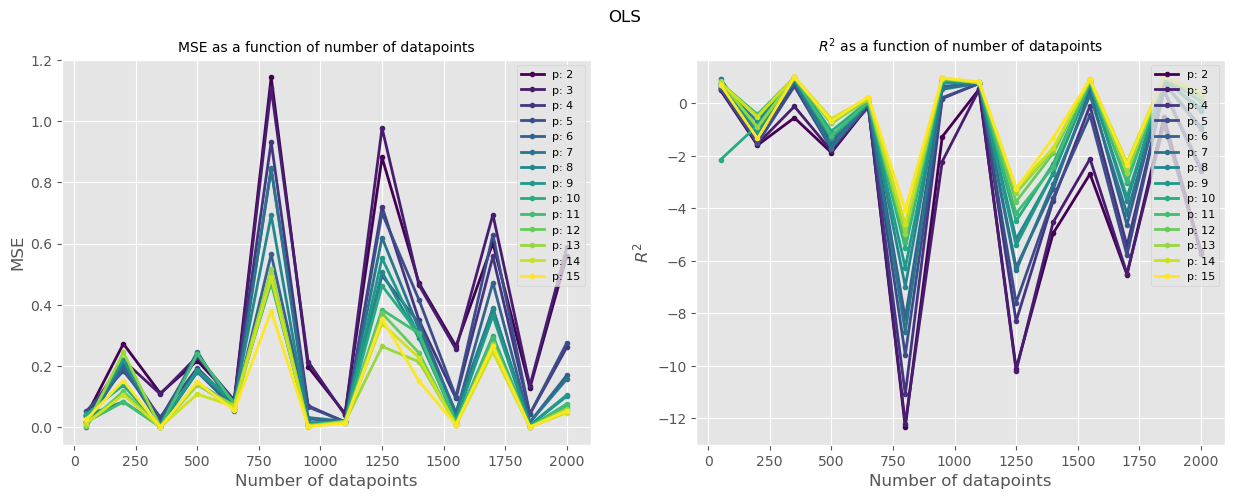

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[0].plot(p_df['n'], p_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[0].set_title('MSE as a function of number of datapoints', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Number of datapoints')
ax[0].set_ylabel('MSE')

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[1].plot(p_df['n'], p_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[1].set_title(r'$R^2$ as a function of number of datapoints', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Number of datapoints')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

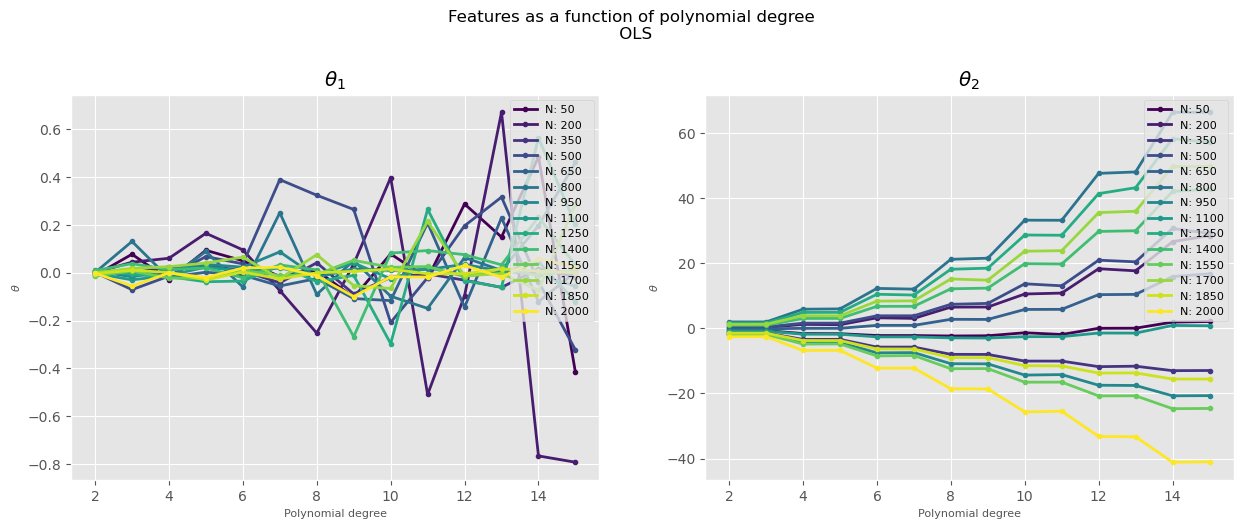

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    ax[1].plot(n_df['p'], n_df['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    #ax[2].plot(n_df['p'], n_df['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')

ax[0].set_title(r'$\theta_1$')
ax[1].set_title(r'$\theta_2$')
#ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'Features as a function of polynomial degree \n OLS', y=1.05)

for axs in ax:
    axs.legend(loc='upper right', fontsize=8)
    axs.set_xlabel('Polynomial degree', fontsize=8)
    axs.set_ylabel(r'$\theta$', fontsize=8)

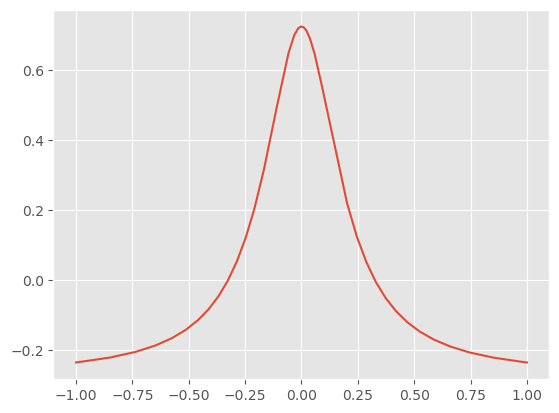

In [188]:
plt.plot(x, y)

# b)

In [178]:
lambdas = np.logspace(-4, 2, 15)

In [179]:
p_vals = np.arange(2, 30)

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
# Min gamle
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        for l in lambdas:
            X = polynomial_features(x, p, intercept=False)
            X, y = standardize(X, y)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

            theta = Ridge_parameters(X_train, y_train)
            y_pred = X_test @ theta

            results.append({'n': n, 'p': p, 'theta': theta, 'lambda': l, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_Ridge = pd.DataFrame(results)

1) train test split
2) poly features on training set only
3) scaling

In [182]:
""" results = []

for n in n_vals:
    x, y = make_data(n)
    x = x.reshape(-1, 1)
    scaler = StandardScaler()
    scaler.fit(x)
    x_s = scaler.transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x_s, y, test_size=test_size)

    for p in p_vals:
        for l in lambdas:
            X = polynomial_features(X_train, p, intercept=False)
            #X_test_ = polynomial_features(X_test, p, intercept=False)

            theta = Ridge_parameters(X, y)
            y_pred = X_test @ theta

            results.append({'n': n, 'p': p, 'theta': theta, 'lambda': l, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_Ridge = pd.DataFrame(results) """

" results = []\n\nfor n in n_vals:\n    x, y = make_data(n)\n    x = x.reshape(-1, 1)\n    scaler = StandardScaler()\n    scaler.fit(x)\n    x_s = scaler.transform(x)\n    X_train, X_test, y_train, y_test = train_test_split(x_s, y, test_size=test_size)\n\n    for p in p_vals:\n        for l in lambdas:\n            X = polynomial_features(X_train, p, intercept=False)\n            #X_test_ = polynomial_features(X_test, p, intercept=False)\n\n            theta = Ridge_parameters(X, y)\n            y_pred = X_test @ theta\n\n            results.append({'n': n, 'p': p, 'theta': theta, 'lambda': l, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})\n\ndf_Ridge = pd.DataFrame(results) "

Text(0.5, 0.98, 'Ridge \n Datapoints: 2000')

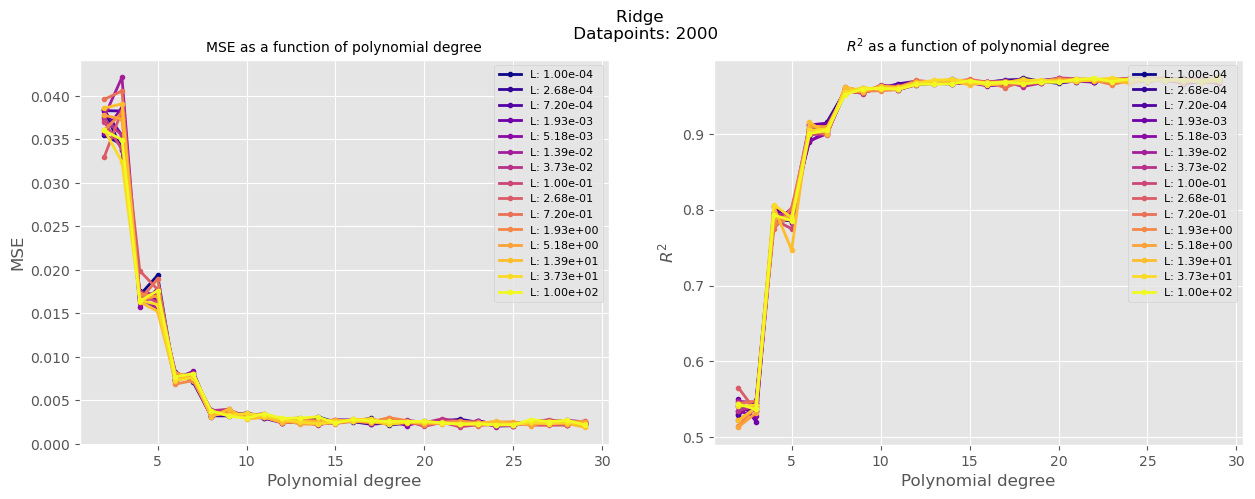

In [183]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='plasma'
num_colors = len(lambdas)
cmap = plt.get_cmap(colormap, num_colors)

for i, l in enumerate(lambdas):
    n_df = n_df = df_Ridge[(df_Ridge['lambda'] == l) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'L: {l:.2e}')
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'L: {l:.2e}')

ax[0].set_title('MSE as a function of polynomial degree', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of polynomial degree', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

In [184]:
lambdas[0]

np.float64(0.0001)

In [185]:
lambdas[-1]

np.float64(100.0)

Text(0.5, 0.98, 'Ridge \n Datapoints: 2000')

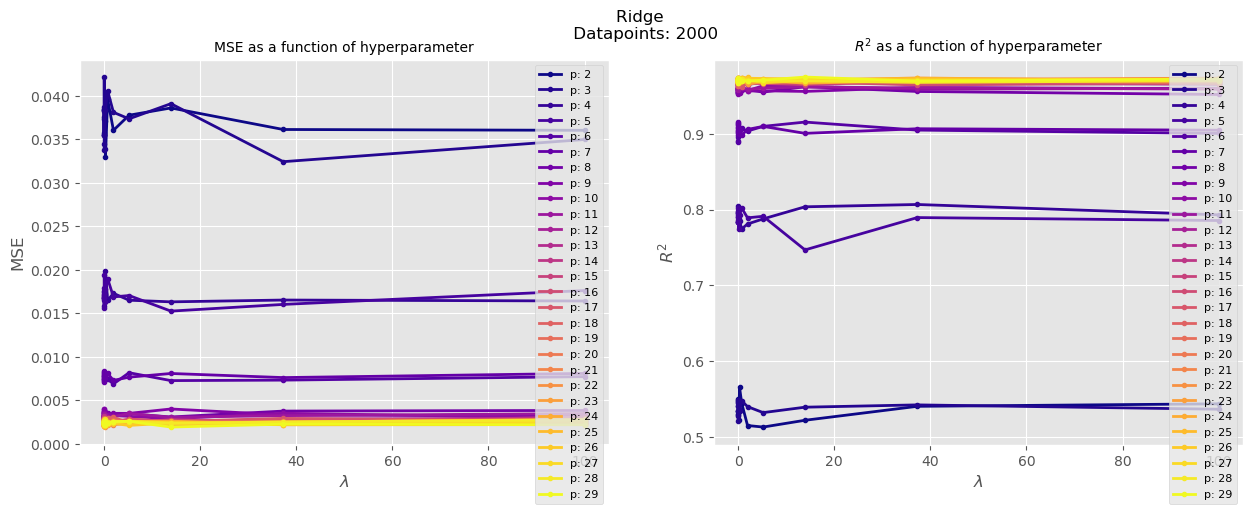

In [186]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='plasma'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    n_df = n_df = df_Ridge[(df_Ridge['p'] == pe) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['lambda'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')
    ax[1].plot(n_df['lambda'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')

ax[0].set_title('MSE as a function of hyperparameter', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel(r'$\lambda$')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of hyperparameter', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

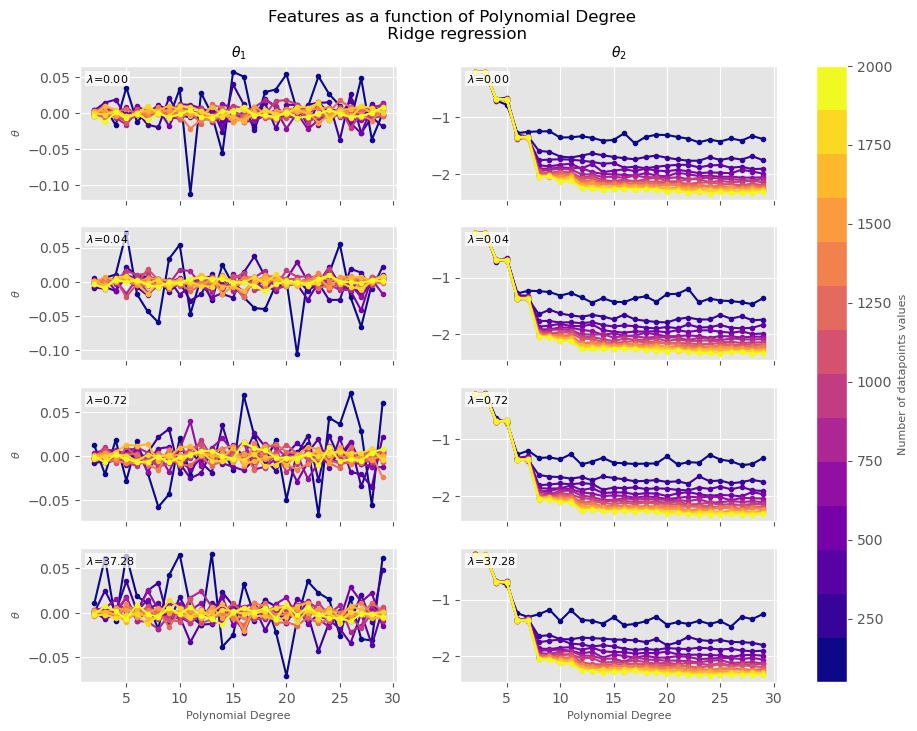

In [187]:
# Selecting specific lambda values to plot
lambda_subset = [lambdas[3], lambdas[6], lambdas[9], lambdas[13]]

fig, ax = plt.subplots(4, 2, figsize=(10, 8), sharex='col')
colormap = 'plasma'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for j, l_val in enumerate(lambda_subset):
    for i, en in enumerate(n_vals):
        n_df = df_Ridge[(df_Ridge['n'] == en) & (df_Ridge['lambda'] == l_val)]
        color = cmap(i)
        ax[j, 0].plot(
            n_df['p'], n_df['theta'].apply(lambda x: x[0]),
            marker='o', markersize=3, linewidth=1.5, color=color
        )
        ax[j, 1].plot(
            n_df['p'], n_df['theta'].apply(lambda x: x[1]),
            marker='o', markersize=3, linewidth=1.5, color=color
        )

    ax[j, 0].text(
        0.02, 0.95, rf'$\lambda$={l_val:.2f}',
        transform=ax[j, 0].transAxes,
        fontsize=8, va='top', ha='left',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
    )
    ax[j, 1].text(
        0.02, 0.95, rf'$\lambda$={l_val:.2f}',
        transform=ax[j, 1].transAxes,
        fontsize=8, va='top', ha='left',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
    )

fig.suptitle('Features as a function of Polynomial Degree \n Ridge regression', y=0.95, fontsize=12)

for axs in ax[:, 0]:
    axs.set_ylabel(r'$\theta$', fontsize=8)

ax[0, 0].set_title(r'$\theta_1$', fontsize=10)
ax[0, 1].set_title(r'$\theta_2$', fontsize=10)

ax[3, 0].set_xlabel('Polynomial Degree', fontsize=8)
ax[3, 1].set_xlabel('Polynomial Degree', fontsize=8)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(n_vals), vmax=max(n_vals)))
sm.set_array([])

cbar = fig.colorbar(
    sm, ax=ax.ravel().tolist(), orientation='vertical',
    fraction=0.05, pad=0.05, location='right'
)
cbar.set_label('Number of datapoints values', fontsize=8)

#plt.tight_layout(rect=[0, 0.05, 1, 0.96])
